In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import random as rnd
import gzip
import sys

In [3]:
# Simple algo to swap contents of both cells
def swap_cells(grid, row, col, dir):
	temp = grid[row, col]
	if dir == 0: # swap with down
		grid[row, col] = grid[row + 1, col]
		grid[row + 1, col] = temp
	elif dir == 1:
		grid[row, col] = grid[row, col + 1]
		grid[row, col + 1] = temp

In [4]:
# return the size of the compressed data
def finding_entropy(grid):
	compressed_data = gzip.compress(grid.tobytes())
	compressed_size = sys.getsizeof(compressed_data)
	return compressed_size

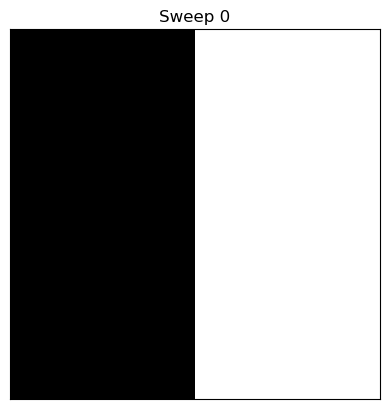

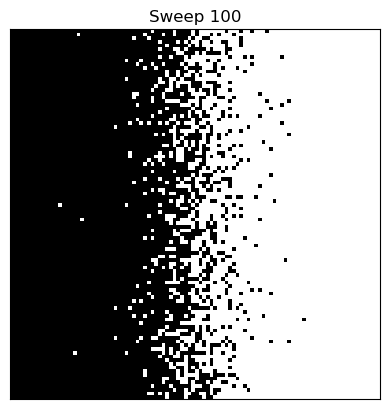

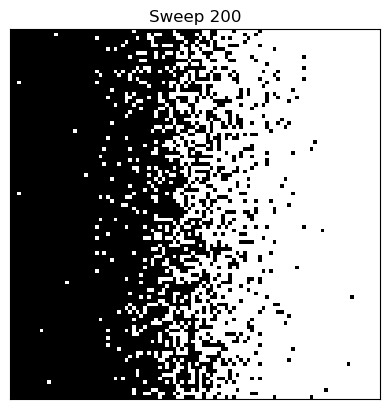

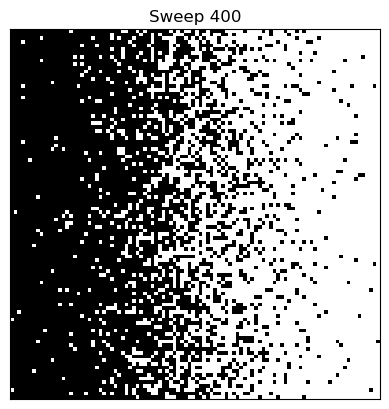

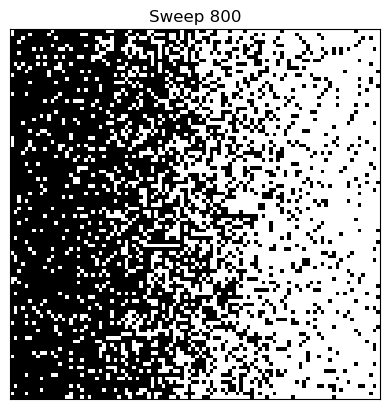

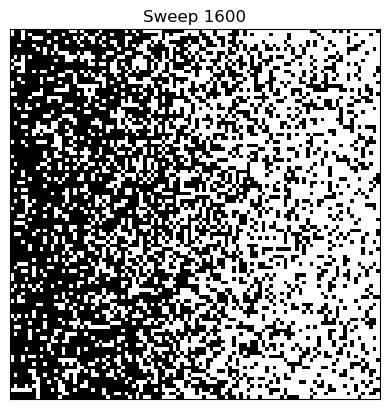

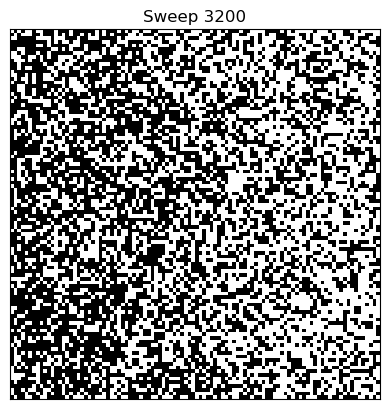

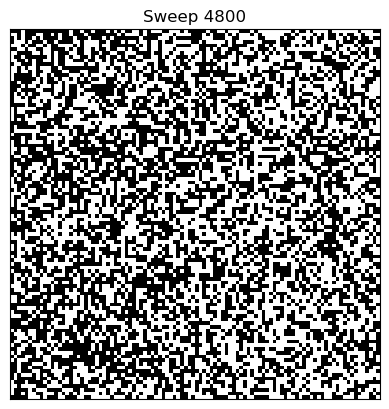

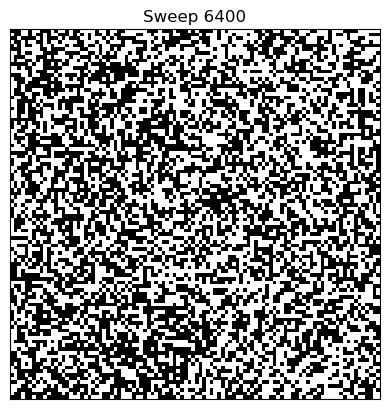

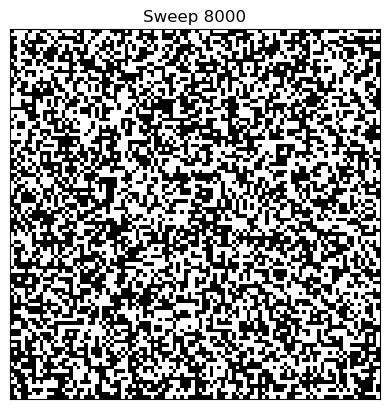

[380, 1145, 1425, 1800, 2155, 2417, 2495, 2493, 2489, 2491]


In [9]:
# 1. This is initial state
gridSize = 100
grid = np.zeros((gridSize, gridSize))

# 2. Make the left side of grid black = starting with gas, right = no gas, white
for row in range(gridSize):
      for col in range(gridSize // 2, gridSize):
            grid[row, col] = 1

direction = [0, 1] # 0 = down, 1 = right

recordSweeps = [0, 100, 200, 400, 800, 1600, 3200, 4800, 6400, 8000]
entropies = []
for sweep in range(10000):
       if sweep in recordSweeps:
              plt.imshow(grid, cmap='gray', interpolation='nearest')
              plt.title(f"Sweep {sweep}")
              plt.xticks([])
              plt.yticks([])
              plt.show()
              result = finding_entropy(grid)
              entropies.append(result)

       for step in range(gridSize**2):
             row = np.random.randint(0, gridSize - 1)
             col = np.random.randint(0, gridSize - 1)
             dir = np.random.choice(direction)
             swap_cells(grid, row, col, dir)
                    
print(entropies)

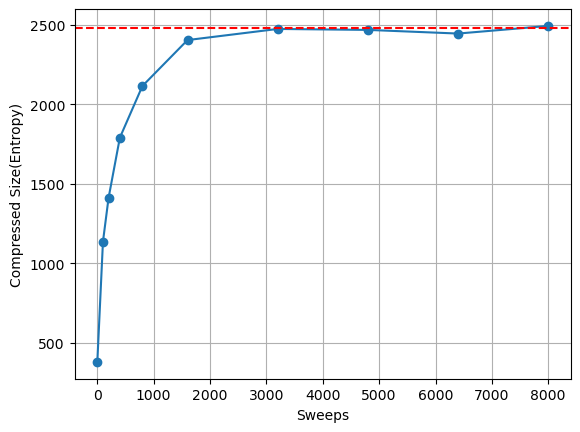

In [8]:
plt.plot(recordSweeps, entropies, marker='o', linestyle='-')
plt.xlabel('Sweeps')
plt.ylabel('Compressed Size(Entropy)')
level_line = 2480
plt.axhline(y=level_line, color='red', linestyle='--', label='Equilibrium')
plt.grid(True)
plt.show()